In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [11]:
turbina = pd.read_csv('T1.csv')
turbina.columns = ['Data/Hora', 'Potência Ativa (kw)', 'Velocidade do Vento(m/s)', 'Curva Teórica(KWh)', 'Direção do Vento(°)']
del turbina['Direção do Vento(°)']
turbina['Data/Hora'] = pd.to_datetime(turbina['Data/Hora'])
display(turbina)

,Data/Hora,Potência Ativa (kw),Velocidade do Vento(m/s),Curva Teórica(KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


<AxesSubplot:xlabel='Velocidade do Vento(m/s)', ylabel='Potência Ativa (kw)'>

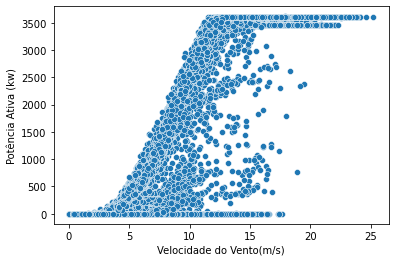

In [13]:
sns.scatterplot(data=turbina, x= 'Velocidade do Vento(m/s)', y= 'Potência Ativa (kw)')

<AxesSubplot:xlabel='Velocidade do Vento(m/s)', ylabel='Curva Teórica(KWh)'>

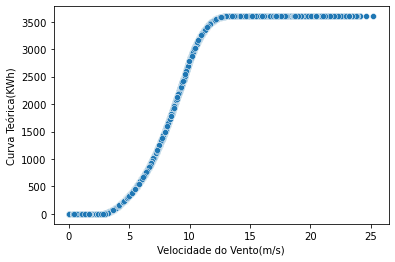

In [14]:
sns.scatterplot(data=turbina, x= 'Velocidade do Vento(m/s)', y= 'Curva Teórica(KWh)')

In [23]:
pot_real= turbina['Potência Ativa (kw)'].tolist()
pot_teorica = turbina['Curva Teórica(KWh)'].tolist()
pot_max = []
pot_min = []
dentro_limite = []

for potencia in pot_teorica:
    pot_max.append(potencia*1.05)
    pot_min.append(potencia*0.95)
    
for p, potencia in enumerate(pot_real):
    if potencia>=pot_min[p] and potencia<=pot_max[p]:
        dentro_limite.append('Dentro')
    elif potencia==0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')

print(dentro_limite.count('Dentro')/len(dentro_limite))


0.37286760340391845


In [24]:
turbina['DentroLimite'] = dentro_limite
display(turbina)

,Data/Hora,Potência Ativa (kw),Velocidade do Vento(m/s),Curva Teórica(KWh),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


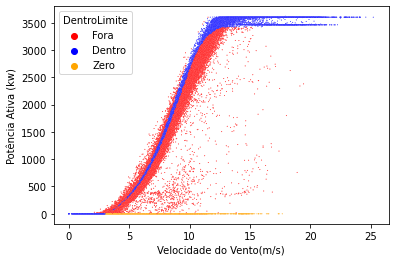

In [36]:
cores={'Dentro':'blue','Fora':'red','Zero':'orange'}
graf=sns.scatterplot(data=turbina, x='Velocidade do Vento(m/s)', y='Potência Ativa (kw)',hue='DentroLimite', s=1,palette=cores)
